In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
TRAIN_CSV = "C:/Users/juane/OneDrive/Escritorio/Datos/Kaggle_Titanic/train.csv"
TEST_CSV = "C:/Users/juane/OneDrive/Escritorio/Datos/Kaggle_Titanic/test.csv"

In [3]:
#Join datasets
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])

In [4]:
# Display the first few rows of the combined dataset
all_data_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
train 0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
      1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
      2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
      3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
      4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

         RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
train 0          0.0        0.0           0.0     0.0     0.0   
      1        109.0        9.0          25.0   549.0    44.0   
      2         43.0     3576.0           0.0  6715.0    49.0   
      3          0.0     1283.0         371.0  3329.0   193.0   
      4        303.0       70.0         151.0   565.0     2.0   

                      Name Transported  
train 0    Maham Ofracculy       False  
      1       Juanna Vines        True  
      2      Altark Susent       False  
      3       Solam Susent       False  
      4  Willy Santantines        True

In [5]:
#Display all the columns
all_data_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
#Select the columns for a better reading of the dataset
selected_columns = ['HomePlanet',
                    'CryoSleep',
                    'Destination', 
                    'Age',
                    'VIP',
                    'RoomService',
                    'FoodCourt',
                    'ShoppingMall',
                    'Spa',
                    'VRDeck',
                    'Transported'] # incluímos la variable objetivo

all_data_df = all_data_df[selected_columns]
all_data_df.head()                

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
train 0     Europa     False  TRAPPIST-1e  39.0  False          0.0   
      1      Earth     False  TRAPPIST-1e  24.0  False        109.0   
      2     Europa     False  TRAPPIST-1e  58.0   True         43.0   
      3     Europa     False  TRAPPIST-1e  33.0  False          0.0   
      4      Earth     False  TRAPPIST-1e  16.0  False        303.0   

         FoodCourt  ShoppingMall     Spa  VRDeck Transported  
train 0        0.0           0.0     0.0     0.0       False  
      1        9.0          25.0   549.0    44.0        True  
      2     3576.0           0.0  6715.0    49.0       False  
      3     1283.0         371.0  3329.0   193.0       False  
      4       70.0         151.0   565.0     2.0        True

In [7]:
# Display general information about the dataset
print(all_data_df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12970 entries, ('train', 0) to ('test', 4276)
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [8]:
# Analyze missing values
print(all_data_df.isnull().sum())

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64


In [9]:
# Handle missing values
# Fill missing values in numerical columns with the mean
all_data_df['Age'].fillna(all_data_df['Age'].mean(), inplace=True)
all_data_df['RoomService'].fillna(all_data_df['RoomService'].mean(), inplace=True)
all_data_df['FoodCourt'].fillna(all_data_df['FoodCourt'].mean(), inplace=True)
all_data_df['ShoppingMall'].fillna(all_data_df['ShoppingMall'].mean(), inplace=True)
all_data_df['Spa'].fillna(all_data_df['Spa'].mean(), inplace=True)
all_data_df['VRDeck'].fillna(all_data_df['VRDeck'].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
all_data_df['HomePlanet'].fillna(all_data_df['HomePlanet'].mode()[0], inplace=True)
all_data_df['CryoSleep'].fillna(all_data_df['CryoSleep'].mode()[0], inplace=True)
all_data_df['Destination'].fillna(all_data_df['Destination'].mode()[0], inplace=True)
all_data_df['VIP'].fillna(all_data_df['VIP'].mode()[0], inplace=True)
all_data_df['Transported'].fillna(all_data_df['Transported'].mode()[0], inplace=True)

In [10]:
# Verify that there are no missing values left
print(all_data_df.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [11]:
# Display statistical description of the dataset
all_data_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.236710,640.996685,1566.618306,583.550067,1117.835494,1167.840416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,126.000000,47.000000,87.000000,64.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
# Function to identify outliers using the Interquartile Range (IQR)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [13]:
# Identify outliers in numerical columns
outliers_age = identify_outliers(all_data_df, 'Age')
outliers_room_service = identify_outliers(all_data_df, 'RoomService')
outliers_food_court = identify_outliers(all_data_df, 'FoodCourt')
outliers_shopping_mall = identify_outliers(all_data_df, 'ShoppingMall')
outliers_spa = identify_outliers(all_data_df, 'Spa')
outliers_vr_deck = identify_outliers(all_data_df, 'VRDeck')

# Display the number of outliers found
print(f"Outliers in Age: {len(outliers_age)}")
print(f"Outliers in RoomService: {len(outliers_room_service)}")
print(f"Outliers in FoodCourt: {len(outliers_food_court)}")
print(f"Outliers in ShoppingMall: {len(outliers_shopping_mall)}")
print(f"Outliers in Spa: {len(outliers_spa)}")
print(f"Outliers in VRDeck: {len(outliers_vr_deck)}")

Outliers in Age: 237
Outliers in RoomService: 2746
Outliers in FoodCourt: 2710
Outliers in ShoppingMall: 2756
Outliers in Spa: 2688
Outliers in VRDeck: 2747


In [14]:
#Create some plots to analyze the dataset

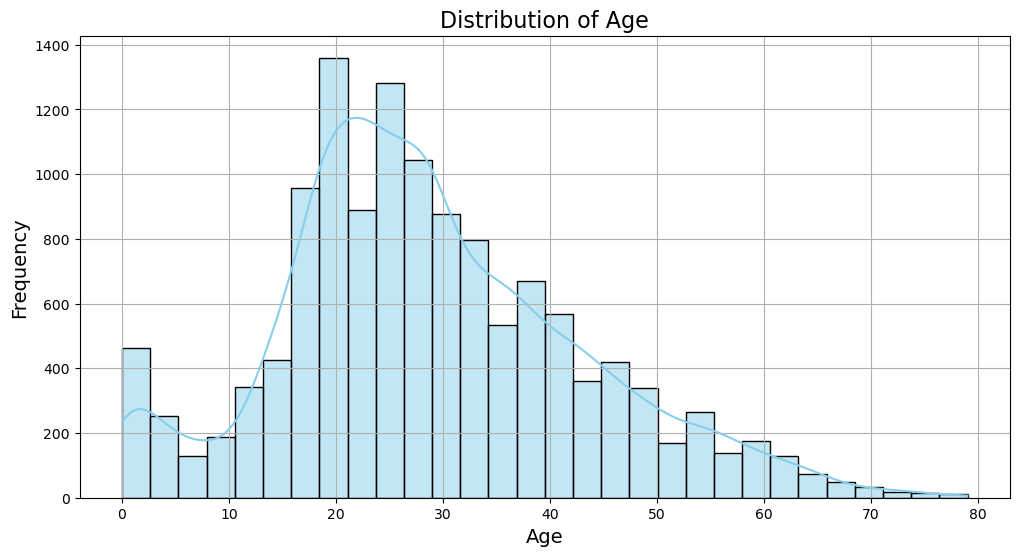

In [15]:
#Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(all_data_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

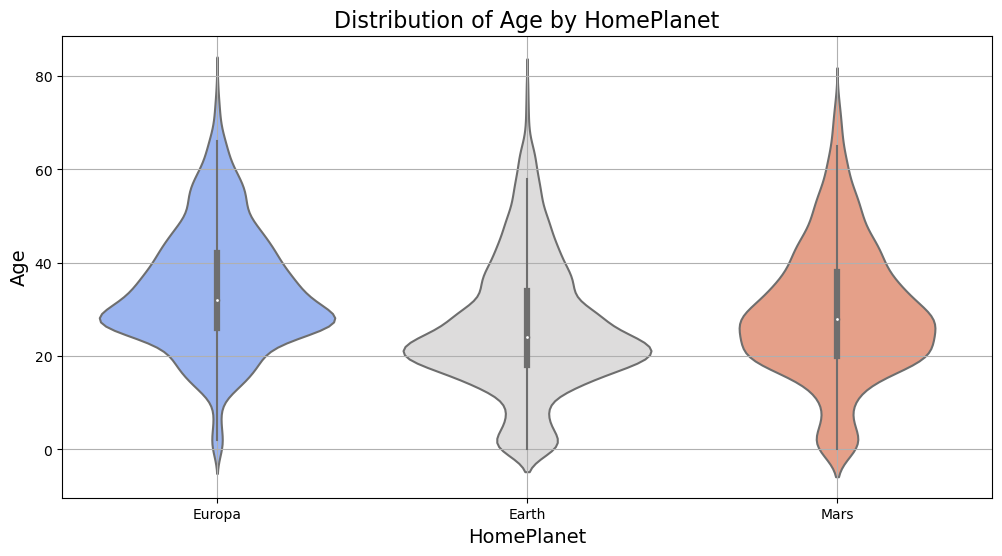

In [16]:
#Distribution of Age by HomePlanet
plt.figure(figsize=(12, 6))
sns.violinplot(x='HomePlanet', y='Age', data=all_data_df, palette='coolwarm')
plt.title('Distribution of Age by HomePlanet', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.show()

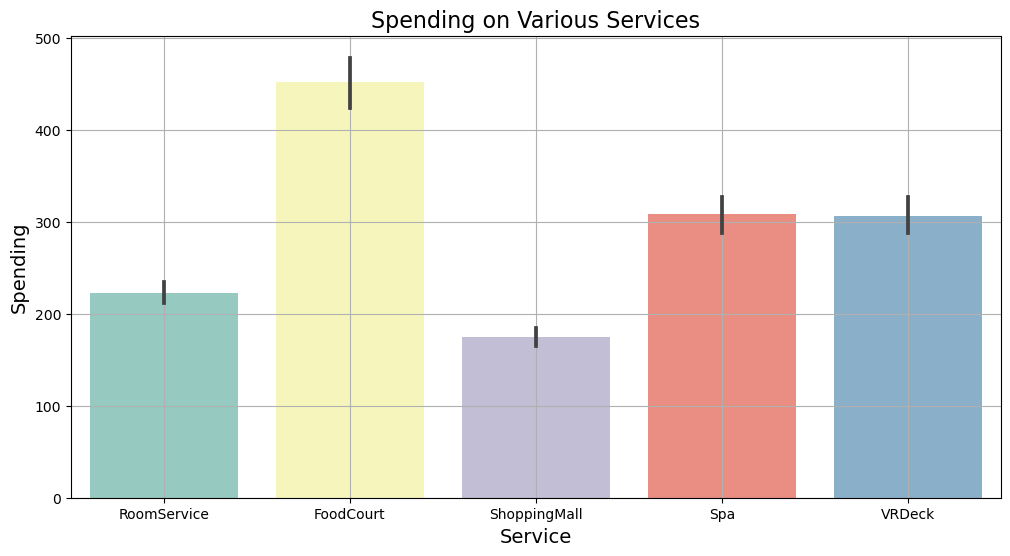

In [17]:
#Spending on RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck
plt.figure(figsize=(12, 6))
sns.barplot(data=all_data_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], palette='Set3')
plt.title('Spending on Various Services', fontsize=16)
plt.xlabel('Service', fontsize=14)
plt.ylabel('Spending', fontsize=14)
plt.grid(True)
plt.show()

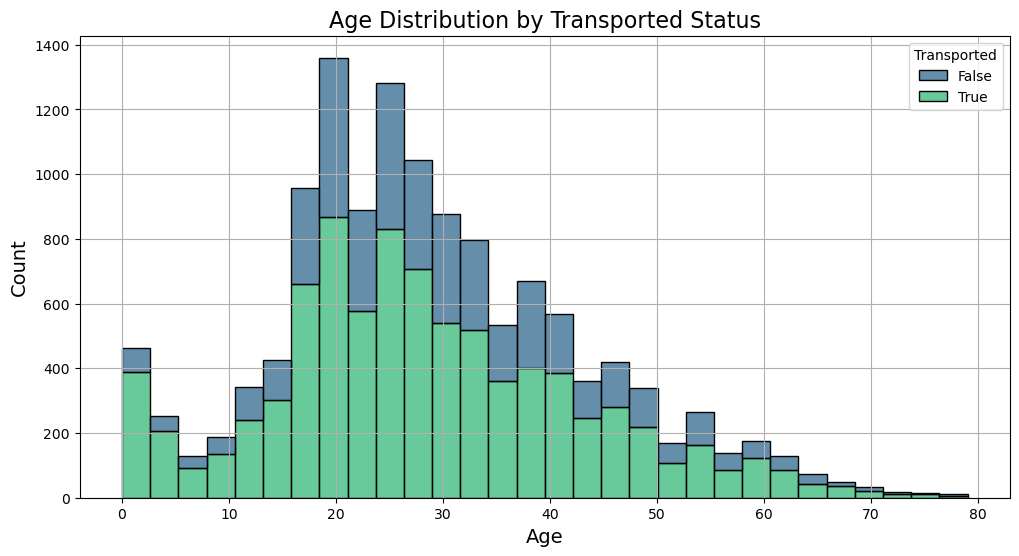

In [18]:
#Age Distribution by Transported Status
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data_df, x='Age', hue='Transported', multiple='stack', palette='viridis', bins=30)
plt.title('Age Distribution by Transported Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

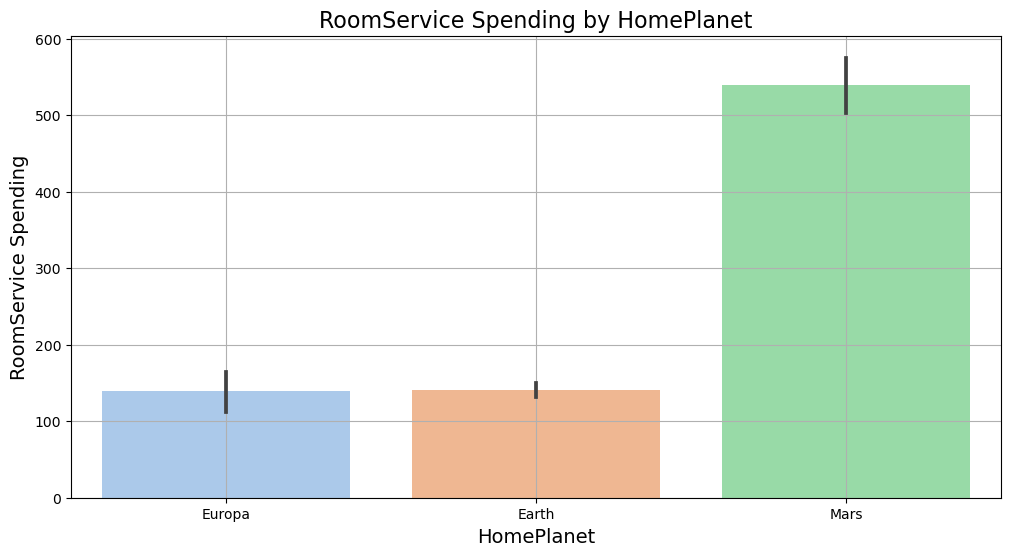

In [19]:
#Spending on RoomService by HomePlanet
plt.figure(figsize=(12, 6))
sns.barplot(x='HomePlanet', y='RoomService', data=all_data_df, palette='pastel')
plt.title('RoomService Spending by HomePlanet', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('RoomService Spending', fontsize=14)
plt.grid(True)
plt.show()

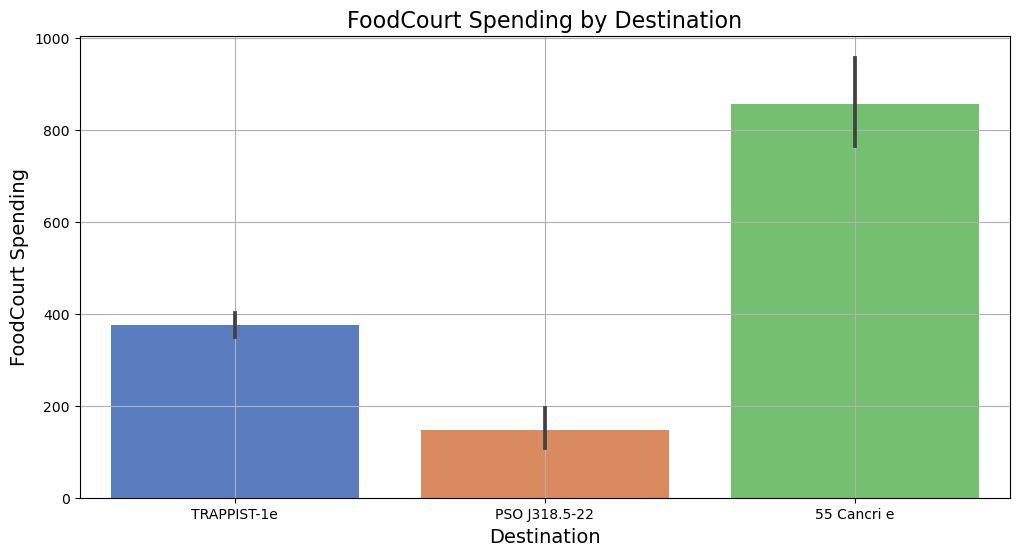

In [20]:
#Spending on FoodCourt by Destination
plt.figure(figsize=(12, 6))
sns.barplot(x='Destination', y='FoodCourt', data=all_data_df, palette='muted')
plt.title('FoodCourt Spending by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=14)
plt.ylabel('FoodCourt Spending', fontsize=14)
plt.grid(True)
plt.show()

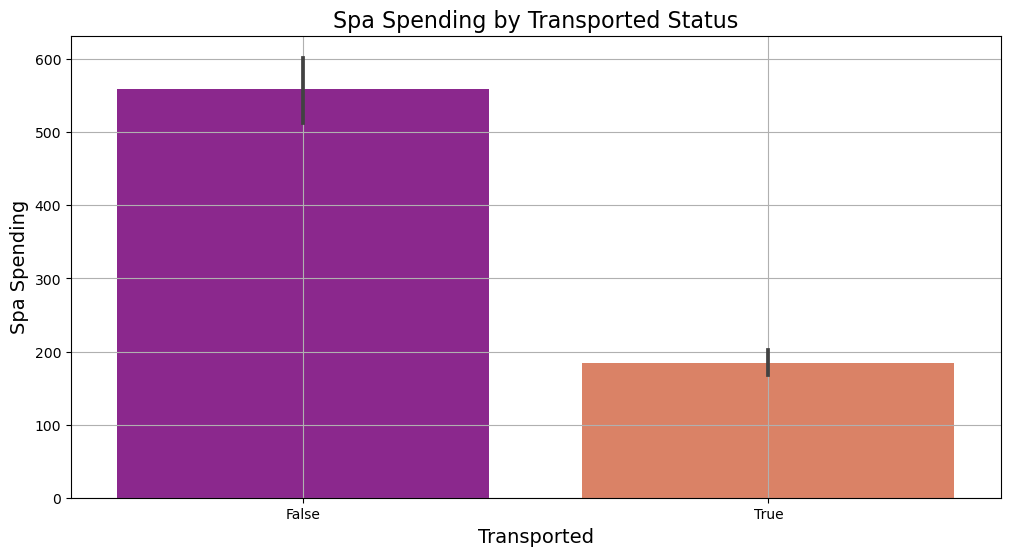

In [21]:
#Spending on Spa by Transported Status
plt.figure(figsize=(12, 6))
sns.barplot(x='Transported', y='Spa', data=all_data_df, palette='plasma')
plt.title('Spa Spending by Transported Status', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Spa Spending', fontsize=14)
plt.grid(True)
plt.show()

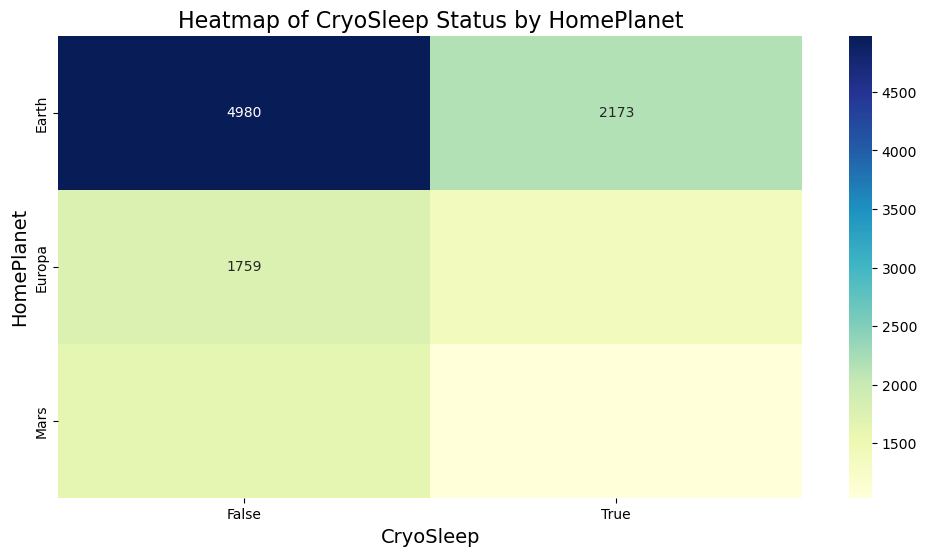

In [22]:
#Heatmap of CryoSleep Status by HomePlanet
plt.figure(figsize=(12, 6))
cryo_homeplanet_pivot = all_data_df.pivot_table(index='HomePlanet', columns='CryoSleep', aggfunc='size', fill_value=0)
sns.heatmap(cryo_homeplanet_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of CryoSleep Status by HomePlanet', fontsize=16)
plt.xlabel('CryoSleep', fontsize=14)
plt.ylabel('HomePlanet', fontsize=14)
plt.show()

<Figure size 1200x600 with 0 Axes>

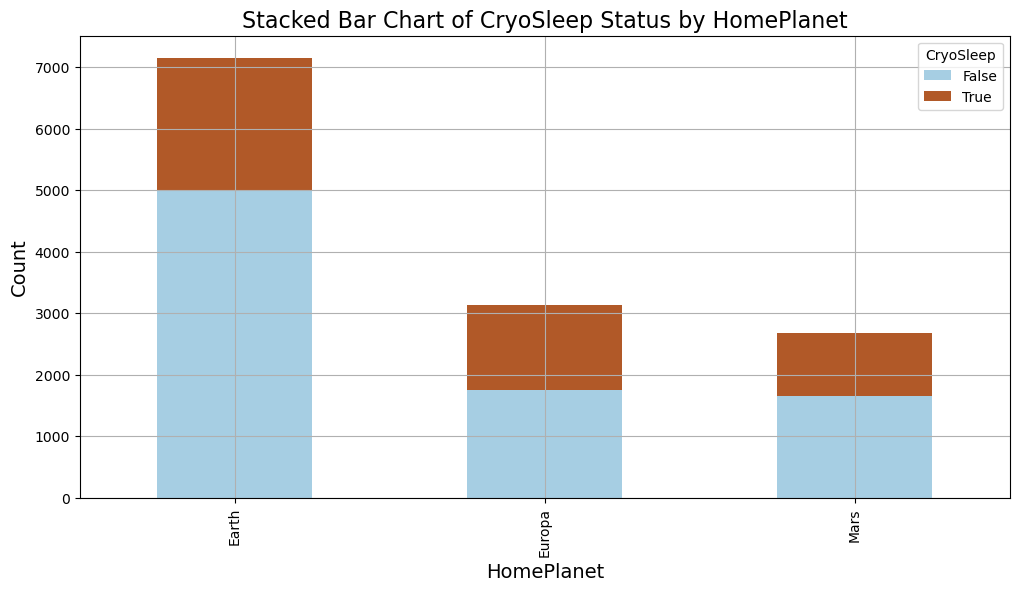

In [23]:
#Stacked Bar Chart of CryoSleep Status by HomePlanet
plt.figure(figsize=(12, 6))
cryo_homeplanet = all_data_df.groupby(['HomePlanet', 'CryoSleep']).size().unstack().fillna(0)
cryo_homeplanet.plot(kind='bar', stacked=True, colormap='Paired', figsize=(12, 6))
plt.title('Stacked Bar Chart of CryoSleep Status by HomePlanet', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='CryoSleep')
plt.grid(True)
plt.show()

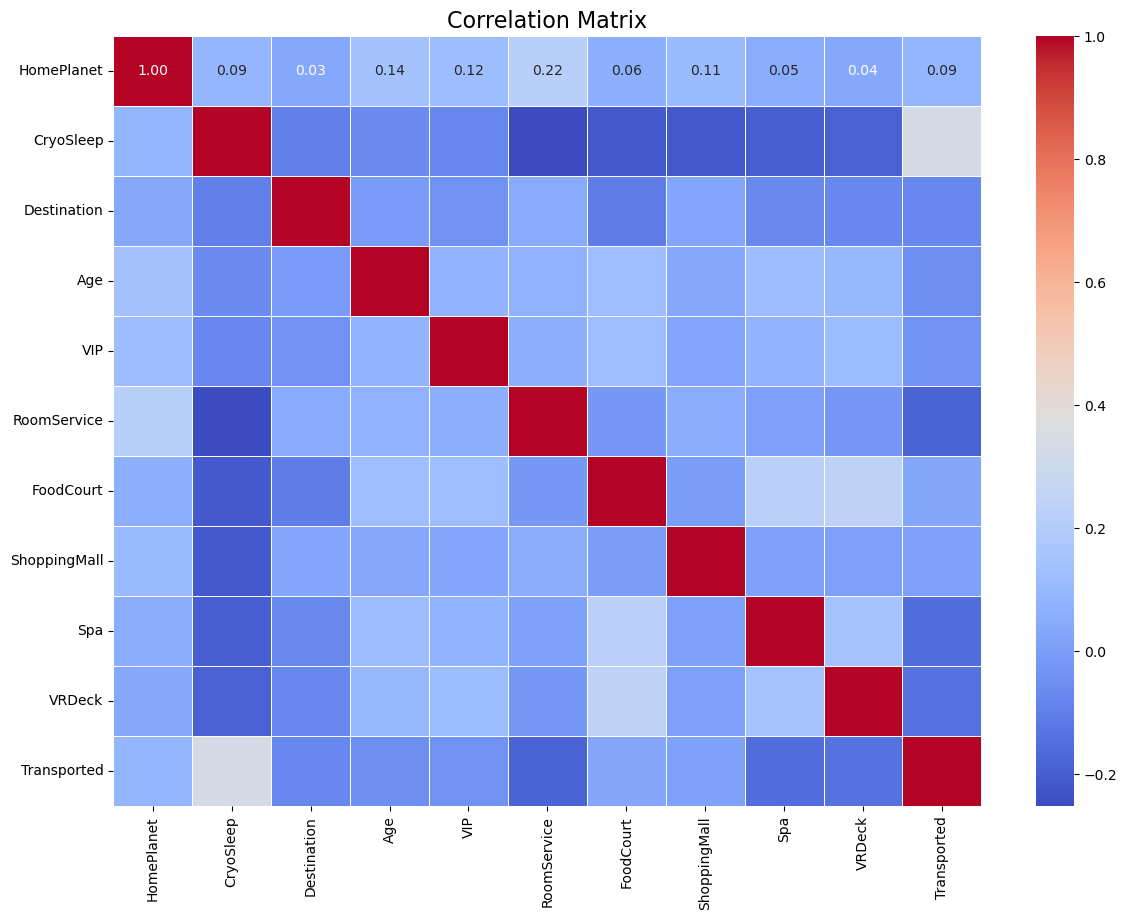

In [24]:
# Convert categorical variables to numerical for correlation analysis
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
for column in categorical_columns:
    all_data_df[column] = all_data_df[column].astype('category').cat.codes

# Calculate the correlation matrix
corr_matrix = all_data_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [25]:
corr_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.088630,0.033180,0.139811,0.119579,0.216149,0.064978,0.108768,0.052184,0.036323,0.086583
CryoSleep,0.088630,1.000000,-0.098933,-0.063832,-0.076891,-0.251759,-0.208124,-0.215163,-0.199169,-0.190276,0.332107
Destination,0.033180,-0.098933,1.000000,-0.010206,-0.037035,0.044914,-0.107585,0.025893,-0.067582,-0.071763,-0.071085
Age,0.139811,-0.063832,-0.010206,1.000000,0.080695,0.066101,0.121210,0.034182,0.115982,0.099858,-0.055904
VIP,0.119579,-0.076891,-0.037035,0.080695,1.000000,0.059386,0.122825,0.024184,0.080705,0.110160,-0.036678
RoomService,0.216149,-0.251759,0.044914,0.066101,0.059386,1.000000,-0.019720,0.055787,0.008801,-0.023429,-0.179106
FoodCourt,0.064978,-0.208124,-0.107585,0.121210,0.122825,-0.019720,1.000000,-0.001556,0.225865,0.240868,0.030647
ShoppingMall,0.108768,-0.215163,0.025893,0.034182,0.024184,0.055787,-0.001556,1.000000,0.010384,0.004301,0.008688
Spa,0.052184,-0.199169,-0.067582,0.115982,0.080705,0.008801,0.225865,0.010384,1.000000,0.145348,-0.158203
VRDeck,0.036323,-0.190276,-0.071763,0.099858,0.110160,-0.023429,0.240868,0.004301,0.145348,1.000000,-0.140214


Key Observations from the Correlation Matrix

HomePlanet:
RoomService: Moderate positive correlation (0.216). Passengers from certain planets might spend more on room service.
Age: Weak positive correlation (0.140). Older passengers might be more likely to come from certain planets.

CryoSleep:
Transported: Moderate positive correlation (0.332). Passengers in cryosleep are more likely to be transported.
RoomService: Moderate negative correlation (-0.252). Passengers in cryosleep spend less on room service.
FoodCourt: Moderate negative correlation (-0.208). Passengers in cryosleep spend less on food court.
ShoppingMall: Moderate negative correlation (-0.215). Passengers in cryosleep spend less on shopping.
Spa: Moderate negative correlation (-0.199). Passengers in cryosleep spend less on spa services.
VRDeck: Moderate negative correlation (-0.190). Passengers in cryosleep spend less on VR deck.

Destination:
Transported: Weak negative correlation (-0.071). The destination might slightly influence whether a passenger is transported.

Age:
FoodCourt: Weak positive correlation (0.121). Older passengers might spend more on food court.
Spa: Weak positive correlation (0.116). Older passengers might spend more on spa services.
VRDeck: Weak positive correlation (0.100). Older passengers might spend more on VR deck.

VIP:
FoodCourt: Weak positive correlation (0.123). VIP passengers might spend more on food court.
VRDeck: Weak positive correlation (0.110). VIP passengers might spend more on VR deck.

RoomService:
Transported: Weak negative correlation (-0.179). Higher spending on room service might slightly decrease the likelihood of being transported.

FoodCourt:
Spa: Moderate positive correlation (0.226). Passengers who spend more on food court also tend to spend more on spa services.
VRDeck: Moderate positive correlation (0.241). Passengers who spend more on food court also tend to spend more on VR deck.

Spa:
Transported: Weak negative correlation (-0.158). Higher spending on spa services might slightly decrease the likelihood of being transported.

VRDeck:
Transported: Weak negative correlation (-0.140). Higher spending on VR deck might slightly decrease the likelihood of being transported.

Insights for Machine Learning Model
CryoSleep has the highest positive correlation with Transported, indicating it could be a significant predictor.
RoomService, Spa, and VRDeck have negative correlations with Transported, suggesting that higher spending in these areas might decrease the likelihood of being transported.
HomePlanet and Age show some correlation with spending habits, which might indirectly affect the Transported status.
These insights can help you select features for your machine learning model. You might consider including CryoSleep, RoomService, Spa, VRDeck, HomePlanet, and Age as features in the model.

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from scipy.stats import uniform, randint

In [27]:
# Feature Engineering: Create new features
all_data_df['TotalSpending'] = all_data_df['RoomService'] + all_data_df['FoodCourt'] + all_data_df['ShoppingMall'] + all_data_df['Spa'] + all_data_df['VRDeck']
all_data_df['SpendingPerAge'] = all_data_df['TotalSpending'] / (all_data_df['Age'] + 1)  # +1 to avoid division by zero

In [28]:
# One-Hot Encoding for categorical variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
encoded_features = one_hot_encoder.fit_transform(all_data_df[categorical_columns])

In [29]:
# Define features and target variable
X = all_data_df.drop('Transported', axis=1)
y = all_data_df['Transported']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Crear el escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test = scaler.transform(X_test)

In [32]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier(random_state=42)

In [33]:
# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [35]:
# Get predicted probabilities for ROC-AUC
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
y_pred_proba_gb = gb_clf.predict_proba(X_test)[:, 1]
y_pred_proba_svm = svm_clf.predict_proba(X_test)[:, 1]
y_pred_proba_knn = knn_clf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

In [36]:
# Evaluate models
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, roc_auc

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg, y_pred_proba_log_reg)
rf_metrics = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)
gb_metrics = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb)
svm_metrics = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm)
knn_metrics = evaluate_model(y_test, y_pred_knn, y_pred_proba_knn)
xgb_metrics = evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb)

In [37]:
# Print evaluation metrics
print(f"Logistic Regression: Accuracy={log_reg_metrics[0]:.2f}, Precision={log_reg_metrics[1]:.2f}, Recall={log_reg_metrics[2]:.2f}, F1-Score={log_reg_metrics[3]:.2f}, ROC-AUC={log_reg_metrics[4]:.2f}")
print(f"Random Forest: Accuracy={rf_metrics[0]:.2f}, Precision={rf_metrics[1]:.2f}, Recall={rf_metrics[2]:.2f}, F1-Score={rf_metrics[3]:.2f}, ROC-AUC={rf_metrics[4]:.2f}")
print(f"Gradient Boosting: Accuracy={gb_metrics[0]:.2f}, Precision={gb_metrics[1]:.2f}, Recall={gb_metrics[2]:.2f}, F1-Score={gb_metrics[3]:.2f}, ROC-AUC={gb_metrics[4]:.2f}")
print(f"SVM: Accuracy={svm_metrics[0]:.2f}, Precision={svm_metrics[1]:.2f}, Recall={svm_metrics[2]:.2f}, F1-Score={svm_metrics[3]:.2f}, ROC-AUC={svm_metrics[4]:.2f}")
print(f"KNN: Accuracy={knn_metrics[0]:.2f}, Precision={knn_metrics[1]:.2f}, Recall={knn_metrics[2]:.2f}, F1-Score={knn_metrics[3]:.2f}, ROC-AUC={knn_metrics[4]:.2f}")
print(f"XGBoost: Accuracy={xgb_metrics[0]:.2f}, Precision={xgb_metrics[1]:.2f}, Recall={xgb_metrics[2]:.2f}, F1-Score={xgb_metrics[3]:.2f}, ROC-AUC={xgb_metrics[4]:.2f}")

Logistic Regression: Accuracy=0.70, Precision=0.72, Recall=0.91, F1-Score=0.80, ROC-AUC=0.77
Random Forest: Accuracy=0.71, Precision=0.77, Recall=0.80, F1-Score=0.78, ROC-AUC=0.77
Gradient Boosting: Accuracy=0.72, Precision=0.78, Recall=0.82, F1-Score=0.80, ROC-AUC=0.79
SVM: Accuracy=0.69, Precision=0.70, Recall=0.95, F1-Score=0.80, ROC-AUC=0.79
KNN: Accuracy=0.69, Precision=0.75, Recall=0.79, F1-Score=0.77, ROC-AUC=0.72
XGBoost: Accuracy=0.72, Precision=0.76, Recall=0.85, F1-Score=0.80, ROC-AUC=0.77


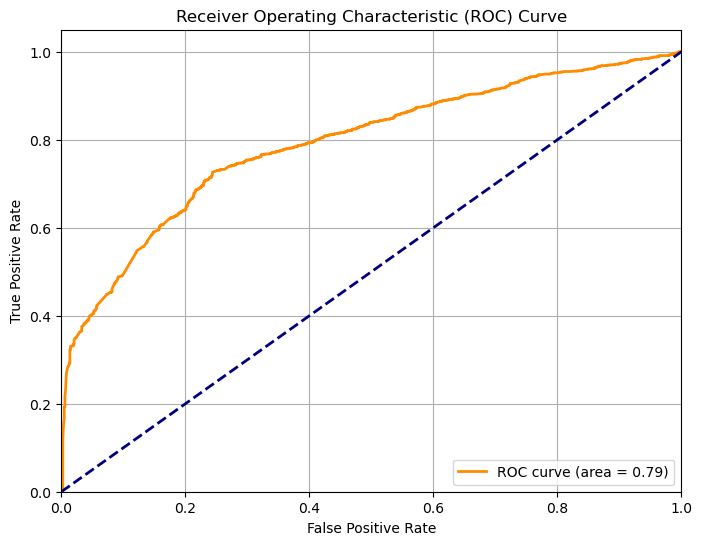

In [38]:
# Plot ROC Curve for the best model - Gradient Boosting
best_model = gb_clf
y_pred_proba_best = y_pred_proba_gb

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\juane\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

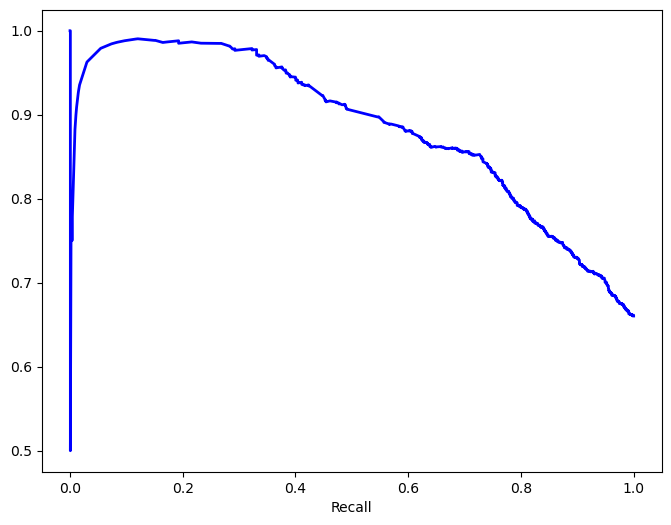

In [39]:
# Plot Precision-Recall Curve for the best model
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt

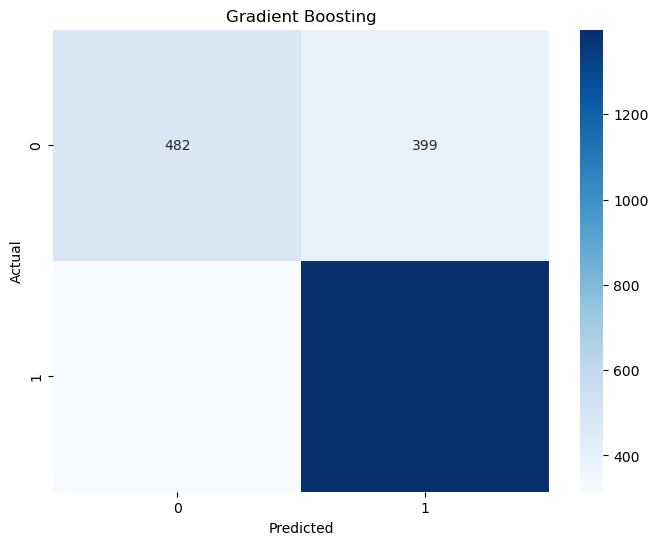

In [41]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Generate and plot the confusion matrix for the Gradient Boosting model
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')

In [44]:
# Generate the confusion matrix for the Gradient Boosting model
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Print the confusion matrix
print("Confusion Matrix for Gradient Boosting:")
print(cm_gb)

Confusion Matrix for Gradient Boosting:
[[ 482  399]
 [ 315 1398]]
